# House Prices: Advanced Regression Techniques

## 1. Defining the problem

The objective here is to build a model capable to predict the sales price for a set of houses.

## 2. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 3. Getting data

In [4]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Exploratory Analysis

In [8]:
df = train.copy()

In [9]:
#df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index,inplace=True)

In [10]:
#df.drop(df[(df['LotArea']>60000)].index,inplace=True)

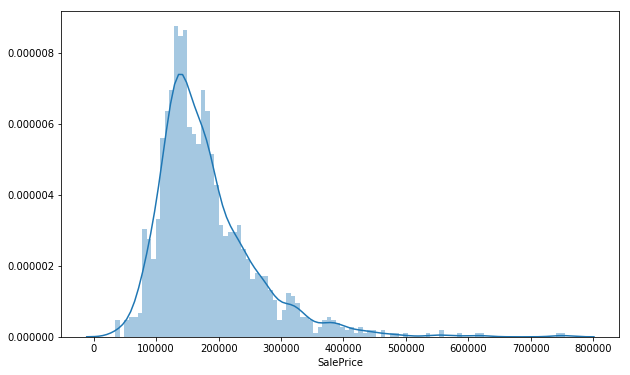

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df['SalePrice'],bins=100)

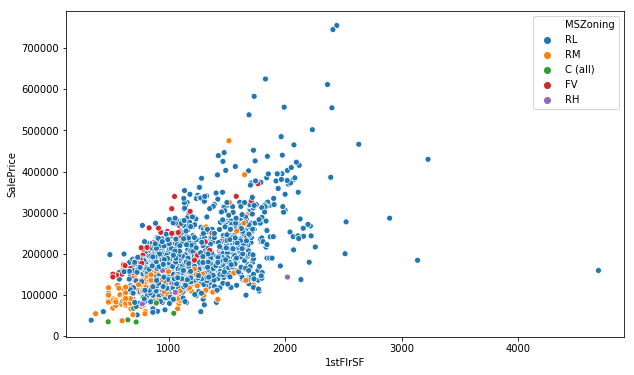

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df,hue='MSZoning')

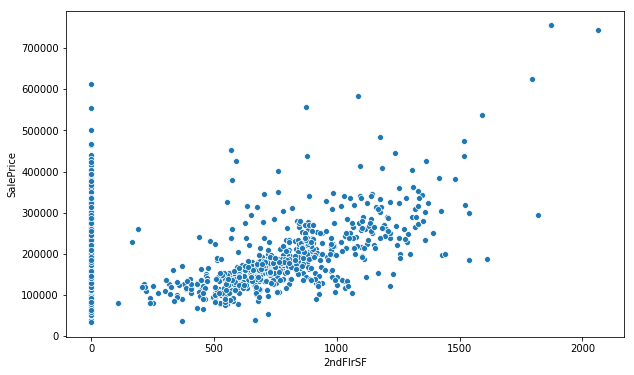

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=df)

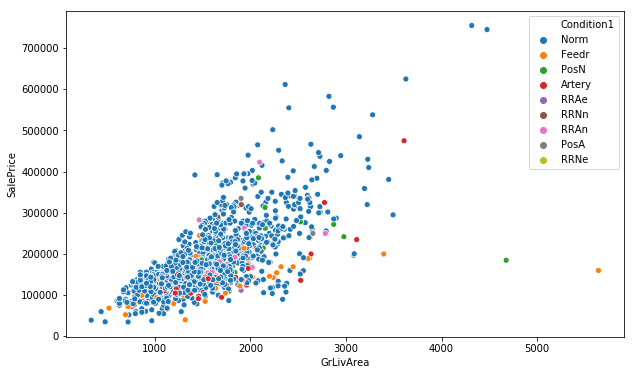

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df,hue='Condition1')

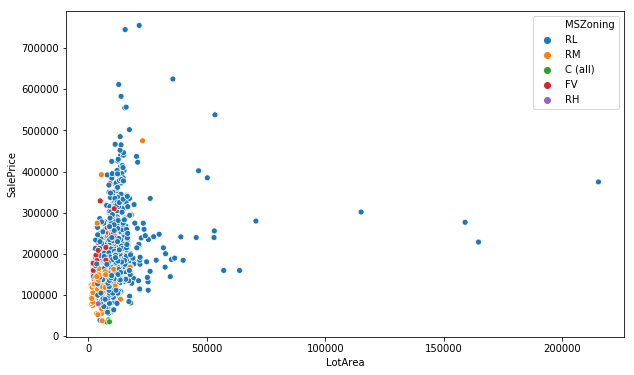

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='LotArea',y='SalePrice',data=df,hue='MSZoning')

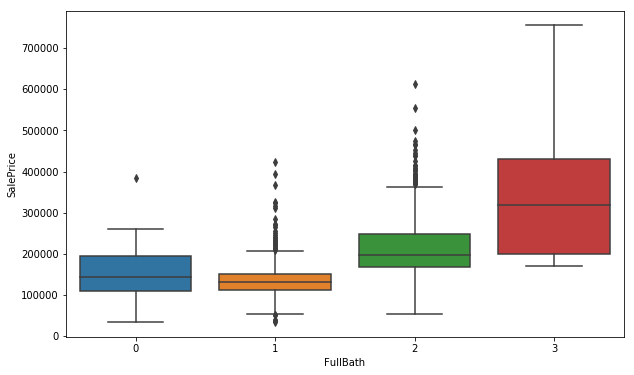

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='FullBath',y='SalePrice',data=df)

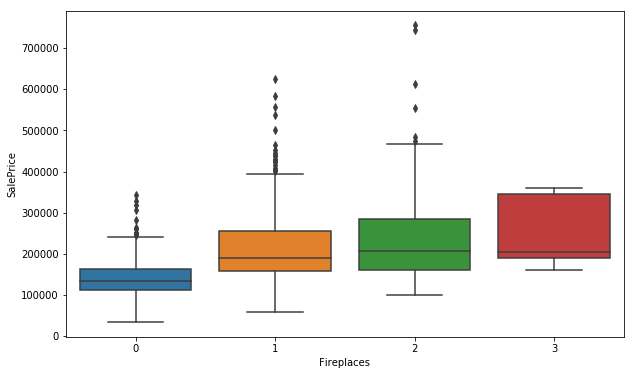

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fireplaces',y='SalePrice',data=df)

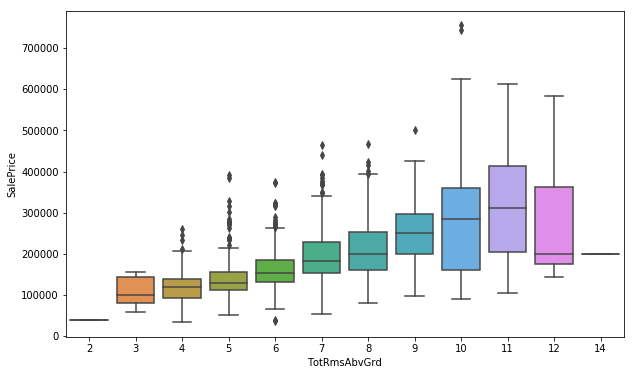

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df)

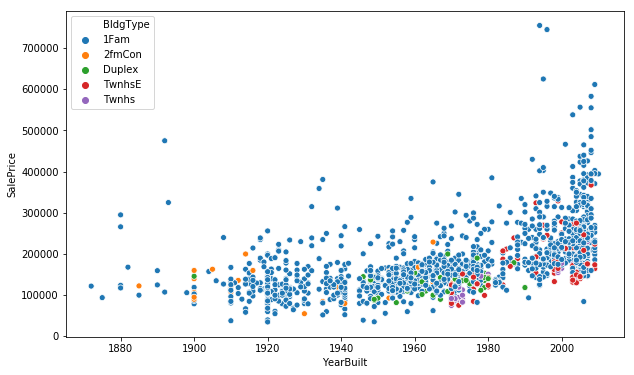

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearBuilt',y='SalePrice',data=df,hue='BldgType')

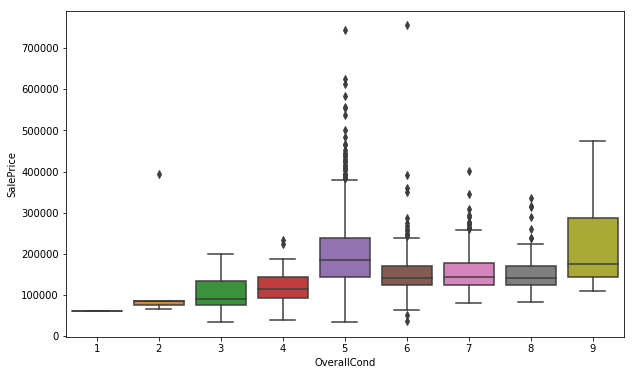

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallCond',y='SalePrice',data=df)

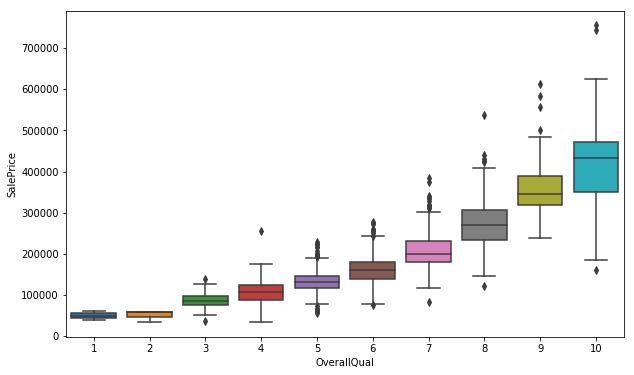

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

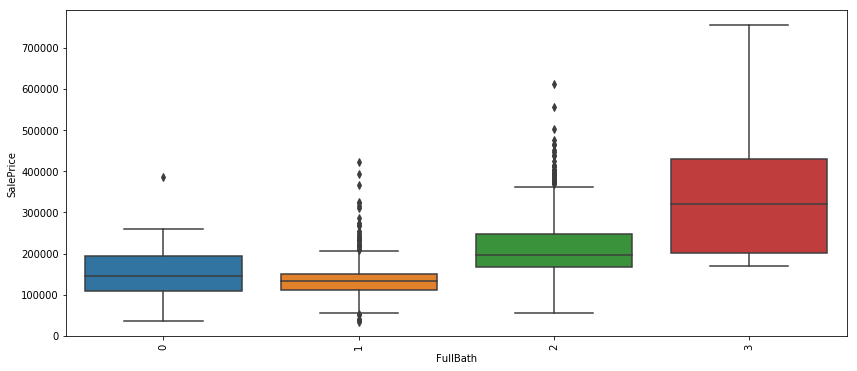

In [22]:
plt.figure(figsize=(14,6))
sns.boxplot(x='FullBath',y='SalePrice',data=df)
plt.xticks(rotation=90);

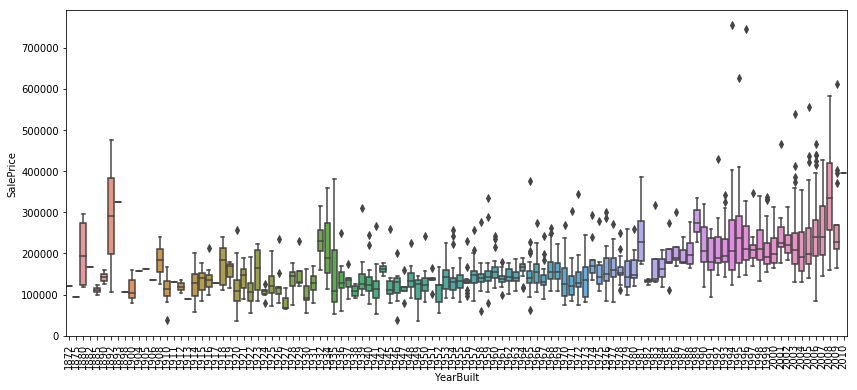

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(x='YearBuilt',y='SalePrice',data=df)
plt.xticks(rotation=90);

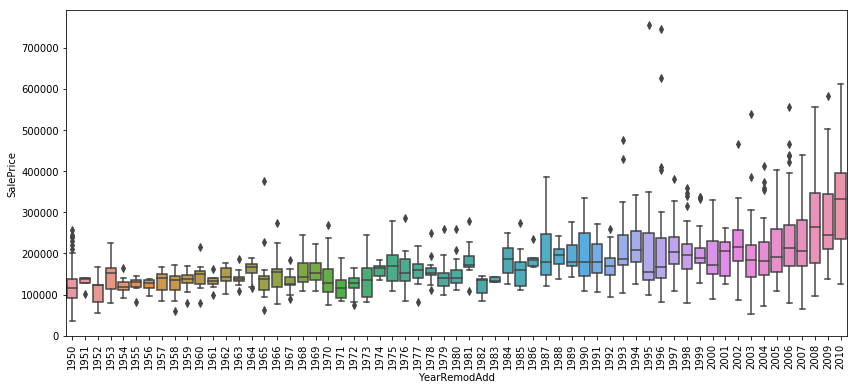

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(x='YearRemodAdd',y='SalePrice',data=df)
plt.xticks(rotation=90);

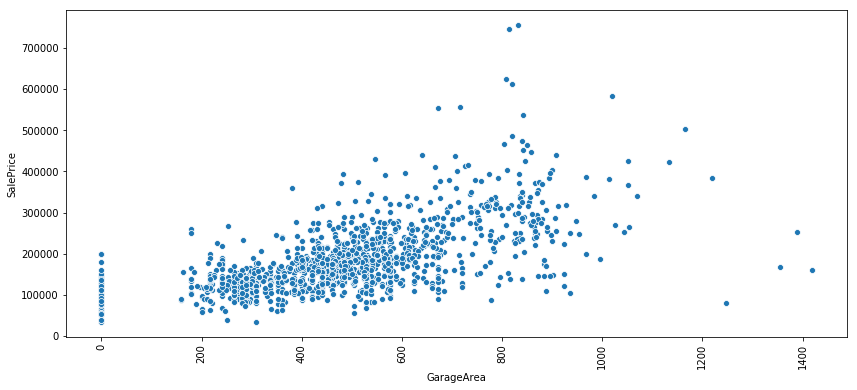

In [25]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='GarageArea',y='SalePrice',data=df)
plt.xticks(rotation=90);

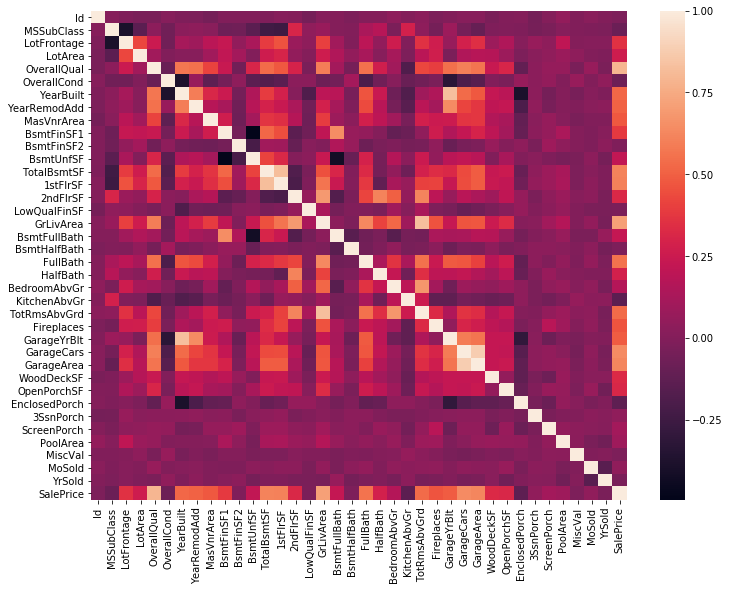

In [26]:
plt.figure(figsize=(12,9));
sns.heatmap(df.corr())

## Training a Linear Regression Model

### X and y arrays

In [27]:
#df.columns

In [28]:
X = df[['LotArea','FullBath','GrLivArea','TotRmsAbvGrd','YearBuilt','GarageCars',
        'GarageArea','MSZoning','BldgType','OverallQual','OverallCond','Fireplaces',
       'TotRmsAbvGrd','YearRemodAdd']].copy()
y = df['SalePrice']

In [29]:
mszoning = pd.get_dummies(X['MSZoning'],drop_first=True)
bldgtype = pd.get_dummies(X['BldgType'],drop_first=True)
overallqual = pd.get_dummies(X['OverallQual'],drop_first=True)
overallcond = pd.get_dummies(X['OverallCond'],drop_first=True)
#utilities = pd.get_dummies(X['Utilities'],drop_first=True)
#condition1 = pd.get_dummies(X['Condition1'],drop_first=True)
#condition2 = pd.get_dummies(X['Condition2'],drop_first=True)

In [30]:
X.drop(['MSZoning','BldgType','OverallQual','OverallCond'],axis=1,inplace=True)

In [31]:
X = pd.concat([X,mszoning,bldgtype,overallqual,overallcond],axis=1)

In [32]:
#X.info()

### Modeling

In [33]:
# Linear model using numerical features
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
#coeff_df

In [37]:
pred = np.log10(lm.predict(X))

Text(0, 0.5, 'Predicted Y')

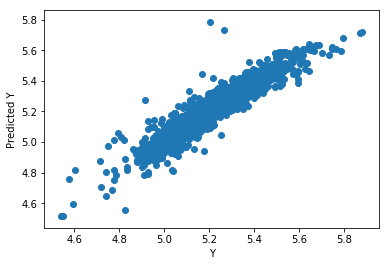

In [38]:
plt.scatter(np.log10(y),pred)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [39]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(np.log10(y),pred))
print('MSE: ', metrics.mean_squared_error(np.log10(y),pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(np.log10(y),pred)))
print('R²: ', metrics.explained_variance_score(np.log10(y),pred))

MAE:  0.04577320491187307
MSE:  0.004051527817712233
RMSE:  0.06365161284454804
R²:  0.8655695498380069


### Applying the model

In [40]:
#test.info()

In [41]:
df_test = test.copy()

In [42]:
X_test = df_test[['LotArea','FullBath','GrLivArea','TotRmsAbvGrd','YearBuilt','GarageCars',
        'GarageArea','MSZoning','BldgType','OverallQual','OverallCond','Fireplaces',
       'TotRmsAbvGrd','YearRemodAdd']].copy()

In [43]:
mszoning_test = pd.get_dummies(X_test['MSZoning'],drop_first=True)
bldgtype_test = pd.get_dummies(X_test['BldgType'],drop_first=True)
overallcond_test = pd.get_dummies(X_test['OverallCond'],drop_first=True)
overallqual_test = pd.get_dummies(X_test['OverallQual'],drop_first=True)
#utilities_test = pd.get_dummies(X_test['Utilities'],drop_first=True)
#condition1_test = pd.get_dummies(X_test['Condition1'],drop_first=True)
#condition2_test = pd.get_dummies(X_test['Condition2'],drop_first=True)

In [44]:
X_test.drop(['MSZoning','BldgType','OverallQual','OverallCond'],axis=1,inplace=True)

In [45]:
X_test = pd.concat([X_test,mszoning_test,bldgtype_test,overallqual_test,overallcond_test],axis=1)

In [46]:
X_test.fillna(value=0,inplace=True)

In [47]:
pred_test = lm.predict(X_test)

In [48]:
results = pd.DataFrame([df_test['Id'],pred_test]).T

In [49]:
results.set_axis(['Id','SalePrice'],axis=1,inplace=True)

In [50]:
results['Id'] = results['Id'].astype('Int32')

In [51]:
results.to_csv('results.csv',index=False)

In [52]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null Int32
SalePrice    1459 non-null float64
dtypes: Int32(1), float64(1)
memory usage: 18.6 KB
